<a href="https://colab.research.google.com/github/excellentwork/CryptoClustering/blob/main/Crypto_Clustering_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from utils import load_data, normalize_data, fit_kmeans, perform_pca, compute_elbow_curve, plot_elbow_curve, plot_pca_clusters

In [6]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("/content/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [7]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(market_data_df)

In [9]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index
scaled_df = scaled_df.set_index("coin_id")

# Display sample data
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_range = range(1, 11)
elbow_df = compute_elbow_curve(scaled_df, k_range)

# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame
elbow_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.220364


In [12]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plot_elbow_curve(elbow_df)

NameError: name 'plt' is not defined

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [14]:
# Initialize the K-Means model using the best value for k

model = KMeans(n_clusters=4, random_state=42)

In [15]:
# Fit the K-Means model using the scaled data

model.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(scaled_df)

# View the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [17]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()

In [18]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["cluster"] = predictions

# Display sample data
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


NameError: name 'plt' is not defined

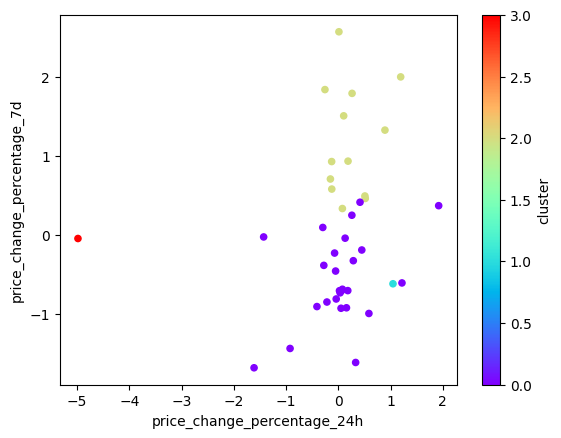

In [19]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

plot_pca_clusters(
    clustered_df,
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    cluster_col='cluster',
    colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.

pca_model = PCA(n_components=3)

In [21]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_df=pca_model.fit_transform(scaled_df)

# View the first five rows of the DataFrame.
pca_df[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [22]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**

In [23]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
cluster_pca_df = pd.DataFrame(
    pca_df,
    columns = ["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data
cluster_pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index

cluster_pca_df = cluster_pca_df.set_index('coin_id')

# Display sample data

cluster_pca_df

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_range = range(1, 11)
elbow_df = compute_elbow_curve(scaled_df, k_range)

# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [25]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plot_elbow_curve(elbow_2_df)

NameError: name 'elbow_2_df' is not defined

#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
model_2 = KMeans(n_clusters=4, random_state=42)

In [27]:
# Fit the K-Means model using the PCA data
model_2.fit(cluster_pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions_2 = model_2.predict(cluster_pca_df)

# Print the resulting array of cluster values.
print(predictions_2)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [29]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df_copy = cluster_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df_copy["cluster"] = predictions_2

# Display sample data
clustered_pca_df_copy.head()

,PCA1,PCA2,PCA3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


NameError: name 'plt' is not defined

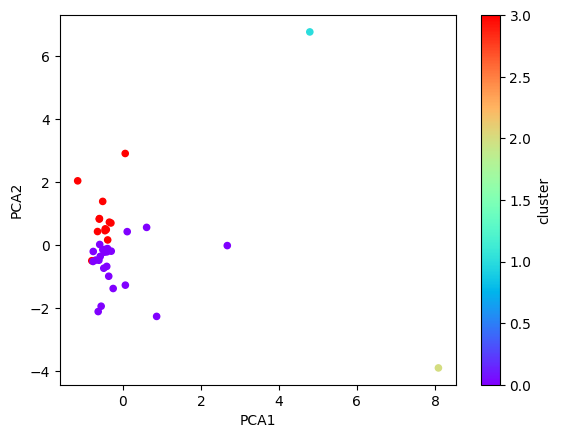

In [30]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`.
plot_pca_clusters(clustered_pca_df_copy,
                  x='PCA1',
                  y='PCA2',
                  cluster_col='cluster',
                  colormap='rainbow')

clustered_pca_df_copy.plot.scatter(
    x='PCA1',
    y='PCA2',
    c='cluster',
    colormap="rainbow")

# Display the plot
clustered_pca_df_copy

### Determine the Weights of Each Feature on each Principal Component

In [31]:
# Use the columns from the original scaled DataFrame as the index.
market_scaled_predictions = pd.DataFrame(pca_model.components_.T, columns=['PCA1', 'PCA2','PCA3'], index=market_data_df.columns)

# Display sample data
market_scaled_predictions

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**
    